<h3 align="center">Neural Networks</h3> 
<h3 align="center">Assignment 4</h3></br> 
<h3 align="center">Team members:</h3> 
<h3 align="center">1.Ravikiran Bhat</h3> 
<h3 align="center">2.Rubanraj Ravichandran</h3> 
<h3 align="center">3.Ramesh Kumar</h3> 

# Exercise 1

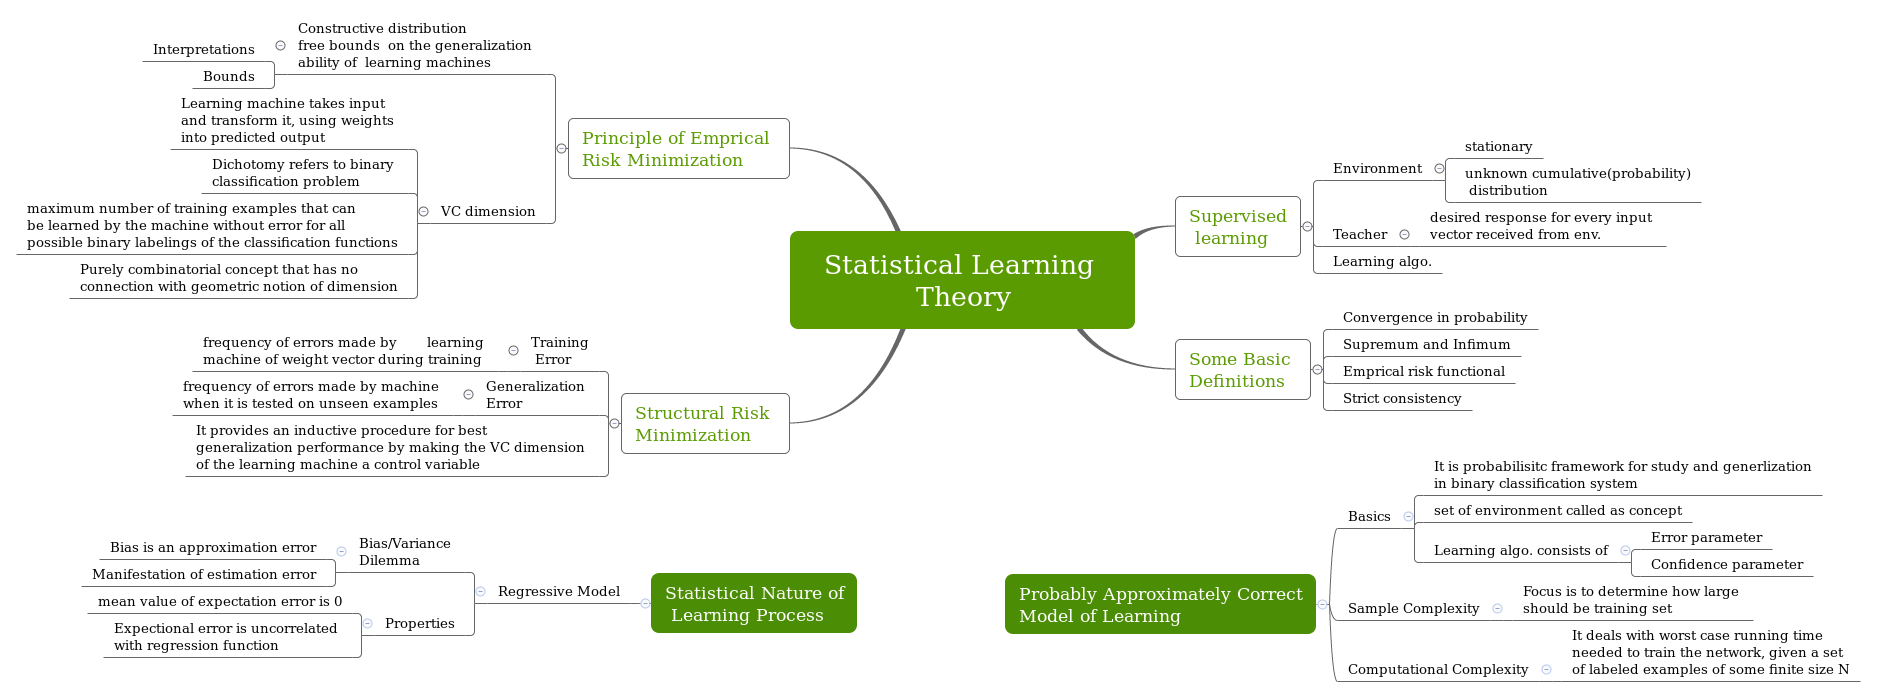

In [80]:
from IPython.display import Image
Image(filename='map.png') 

# Exercise 2

1. If the given set of rectangles Hr is axis aligned, then the VC(Hr) = 4. This is because, there exists at least one configuration of points (such as ${(1, 0),(0,),(−1, 0),(0, −1)}$ ) that can be shattered. But a configuration of 5 points cannot be shattered by an axis alligned rectangle.

2. For the set of all circles Hc in the x,y plane, VC(Hc)=3 . If you see the below figure with 4 points, red belongs to class 1 and blue samples belongs to class 2. In this case, it is not possible to shatter them with single circle. So we can conclude that the VC dimention for circle is 3.


In [81]:
plt.scatter([4,4.5],[5,5.5],color='r')
plt.scatter([4,4.5],[5.5,5.0],color='b')


3.For the set Ht of all triangles in the x,y plan, the VC(Ht) = 7. Consider 7 points in a circle lables in any order, a triangle can be used to shatter them but if there are 8 points in a circle, a triangle cannot shatter them.

# Exercise 3 - Consistent learner

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


def contained_in_rectangle(rect_bounds, point):
    a = rect_bounds[0]
    b = rect_bounds[1]
    c = rect_bounds[2]
    d = rect_bounds[3]
    
    if point[0] > a and point[0] < b and point[1] > c and point[1] < d:
        return True
    else:
        return False

def generate_sample_point(rect_bounds):
    
    x = random.uniform(0, 100)
    y = random.uniform(0, 100)

    if contained_in_rectangle(rect_bounds, [x,y]):
        sample = {'input': np.array([[1.0,x,y]]),'label':True}
    else:
        sample = {'input': np.array([[1.0,x,y]]),'label':False}
        a
    return sample

def generate_sample_set(rect_bounds, num_of_samples):
    sample_set = []
    for i in range(num_of_samples):
        sample_point = generate_sample_point(rect_bounds)
        sample_set.append(sample_point)
    return sample_set 

def logistic(v):
    return 1.0/(1 + np.exp(-v))

In [50]:
#Training network with the generated sample set

samples = generate_sample_set([10,50,10,50],100)

#intial configurations
bias = 0.5
learning_rate = 0.1
weights = np.array([[bias,0.0,0.0]])

for i in range(10000):
    miss_classified_count = 0
    for sample in samples:
        v = (np.dot(sample['input'],weights.T))
        sigmoid_result = logistic(v)
        desired_result = sample['label']
        current_result = sigmoid_result >= 0.5
        if current_result != desired_result:
            error = desired_result - sigmoid_result
            weights = weights + (learning_rate*error*sample['input'])
            miss_classified_count += 1

#updated bias,weights and number of times wrongly classified
print weights,miss_classified_count      

/home/ruby/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in exp


[[ 276.13976073  -11.29991441   -3.53380694]] 20


1000


/home/ruby/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in exp


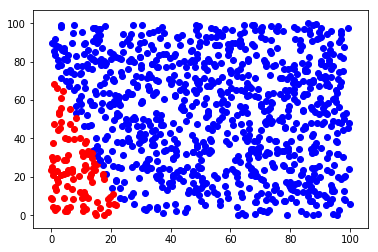

In [51]:
#testing phase
test_samples = generate_sample_set([10,50,10,50],1000)
print len(test_samples)
for sample in test_samples:
    v = (np.dot(sample['input'],weights.T))
    sigmoid_result = logistic(v)
    if sigmoid_result >= 0.5:
        plt.scatter(sample['input'][0][1],sample['input'][0][2],c='r')
    else:
        plt.scatter(sample['input'][0][1],sample['input'][0][2],c='b')

# Exercise 4

Consider training a two-input perceptron. Give an upper bound on the number of training examples sufficient to assure with 90%  confidence that the learned perceptron will have true error of at most 5%. Does this bound seem realistic?

# Solution

For a single preceptron with two-inputs, we can compute number of training examples as:

$$m \ge \frac{1}{\epsilon}\left(4 \log_2\left(\frac{2}{\delta}\right) + 8 \left(r+1\right)\log_2\left(\frac{13}{\epsilon}\right)\right)$$

Where:
$\epsilon = 5\% = 0.05$

$\delta = 10\% = 0.10$ 

number of inputs = r = 2

Substituting in above equation:


In [53]:
import numpy as np
epsilon = 0.05
delta = 0.10
r = 2
m = (4 * np.log2(2/delta) + 8*(r + 1) * np.log2(13/epsilon))/epsilon
print "Number of training examples will be equal or greater than ", round(m)

Number of training examples will be equal or greater than  4196.0


# Exercise 5

Consider the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d),  where a ,b , c , and d  are integers in the interval (0,99). Note each concept in this class correspondsto a rectangle with integer-valued boundaries on a portion of the x, y  plane. Hint: Given a region in the plane bounded by the points (0,0)  and (n -1 , n - I),  the number of distinct rectangles with integer-valued boundaries within this region is 1/4 *  n(n+1)^2

a. Give an upper bound on the number of randomly drawn training examples sufficient to assure that for any target concept c  in C,  any consistent learner using H = C  will, with probability 95%, output a hypothesis with error at most 0.15 !

b. Now suppose the rectangle boundaries a, b, c,  and d  take on real values instead of integer values. Update your answer to the first part of this question.

# Solution

For $a \leq x \leq b$, $c \leq x \leq d$ and $x \in \{0, 1, ..., 99\}$

Number of possible combinations can be computed as:
           $$\frac{n(n + 1)}{2} = \frac{99 \cdot 100}{2} = 4950$$ 
           
Similarly,     $c \leq y \leq d$ also has 4950 possible combinations

Therefore, number of distict rectangles can be computed as:
     $$\frac{n(n + 1)^2}{4} = \frac{99 \cdot 100^2}{4} = 247500$$


a. We compute hypothesis size and apply upper bound as:

$$N \leq \frac{1}{\epsilon}[\ln{|H|} + \ln{\frac{1}{\delta}}]$$
     
Since  $\epsilon = 0.15$ and $\delta = 0.05$ is given.

Therefore, substituting in above equation

In [55]:
n = 99
epsilon = 0.15
delta = 0.05
rectangles = (n*((n+1)**2))/4 
# subsitute values in above formula, hypothesis size can be computed as
N = round((1/epsilon)*(np.log(rectangles) + np.log(1/delta)))
print "We need atleast " + str(N) + " examples to compute hypothesis size"

We need atleast 103.0 examples to compute hypothesis size


b. If we take rectangle boundaries such a,b,c,d as real values instead of integer values, then number of examples can be computed as:

$$N \leq \frac{1}{\epsilon}[8 VC \log_2{\frac{13}{\epsilon}}+ 4 \log_2{\frac{2}{\delta}}] $$

Since VC dimension of previous problem(a) is 4 as it is rectangle. Therefore, above equation can be further solved as:


In [56]:
VC = 4
N = round((4 * np.log2(2/delta) + 8*VC * np.log2(13/epsilon))/epsilon)
print "we need atleast ", N, "examples"

we need atleast  1515.0 examples
